In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [34]:
bike_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/Stats-Model-Project/data/toronto_bike_df.csv')
yelp_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/Stats-Model-Project/data/yelp_transit_df.csv')
fsquare_df = pd.read_csv('C:/Users/John/Documents/LHL Lecture Material/Stats-Model-Project/data/fsquare_transit_df.csv')

In [35]:
bike_df
bike_df['coordinates'] = bike_df['lat'].astype(str) + ',' + bike_df['lon'].astype(str)

In [33]:
yelp_fsquare_df = yelp_df.merge(fsquare_df, how="outer")
yelp_fsquare_df.groupby(['name']).count()

,address,yelp_num_stations,coordinates,num_of_stations
name,,,,
Bathurst Subway Station,31,31,31,0
Bay Subway Station,50,50,50,0
Bloor GO Station,24,24,24,0
Bloor-Danforth Subway Line,0,0,22,22
Bloor-Yonge Subway Station,92,51,92,41
...,...,...,...,...
VIA Rail Canada,66,66,66,0
Victoria Park Subway Station,10,0,10,10
Wellesley Subway Station,129,71,129,58


,name,address,yelp_num_stations,coordinates,num_of_stations
0,Union Station,65 Front Street W,7.0,"43.653236,-79.376716",NaN
1,VIA Rail Canada,65 Front Street W,7.0,"43.653236,-79.376716",NaN
2,Queen Station,171 Yonge Street,7.0,"43.653236,-79.376716",NaN
3,Dundas Station,"Toronto, ON M5B 1J3",7.0,"43.653236,-79.376716",NaN
4,St Patrick Subway Station,449 University Avenue,7.0,"43.653236,-79.376716",NaN
...,...,...,...,...,...
2503,Dundas Subway Station,300 Yonge St,NaN,"43.655972,-79.370638",2.0
2504,King Subway Station,70 Yonge St,NaN,"43.655972,-79.370638",2.0
2505,Wellesley Subway Station,551 Yonge St,NaN,"43.666874,-79.381155",3.0
2506,Bloor-Yonge Subway Station,20 Bloor St E,NaN,"43.666874,-79.381155",3.0


In [36]:
yelp_bike_df = yelp_df.merge(bike_df,how='outer')
yelp_bike_df

,name,address,yelp_num_stations,coordinates,lat,lon,num_of_bikes
0,Union Station,65 Front Street W,7.0,"43.653236,-79.376716",43.653236,-79.376716,24
1,VIA Rail Canada,65 Front Street W,7.0,"43.653236,-79.376716",43.653236,-79.376716,24
2,Queen Station,171 Yonge Street,7.0,"43.653236,-79.376716",43.653236,-79.376716,24
3,Dundas Station,"Toronto, ON M5B 1J3",7.0,"43.653236,-79.376716",43.653236,-79.376716,24
4,St Patrick Subway Station,449 University Avenue,7.0,"43.653236,-79.376716",43.653236,-79.376716,24
...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,"43.7611741,-79.5114452",43.761174,-79.511445,18
1496,NaN,NaN,NaN,"43.6428899,-79.3946346",43.642890,-79.394635,18
1497,NaN,NaN,NaN,"43.7603624,-79.5162777",43.760362,-79.516278,18
1498,NaN,NaN,NaN,"43.653359,-79.365023",43.653359,-79.365023,11


<AxesSubplot: xlabel='yelp_num_stations', ylabel='num_of_bikes'>

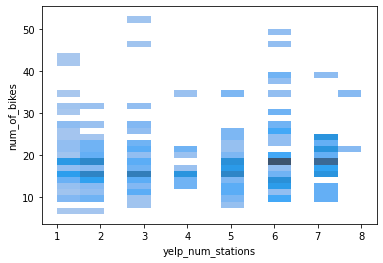

In [49]:
x=yelp_bike_df['yelp_num_stations']
y=yelp_bike_df['num_of_bikes']
sns.histplot(x=x,y=y)

C:\Users\John\AppData\Local\Temp\ipykernel_23452\3263234551.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(yelp_bike_df.corr())


<AxesSubplot: >

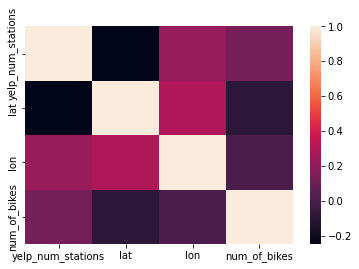

In [43]:
sns.heatmap(yelp_bike_df.corr())

In [44]:
fsquare_bike_df = fsquare_df.merge(bike_df, how='outer')
fsquare_bike_df

,name,address,num_of_stations,coordinates,lat,lon,num_of_bikes
0,NaN,NaN,0,"43.665269,-79.319796",43.665269,-79.319796,19
1,NaN,NaN,0,"43.67142,-79.445947",43.671420,-79.445947,15
2,NaN,NaN,0,"43.666224,-79.317693",43.666224,-79.317693,23
3,Dundas Subway Station,300 Yonge St,6,"43.653236,-79.376716",43.653236,-79.376716,24
4,King Subway Station,70 Yonge St,6,"43.653236,-79.376716",43.653236,-79.376716,24
...,...,...,...,...,...,...,...
1255,Dundas Subway Station,300 Yonge St,2,"43.655972,-79.370638",43.655972,-79.370638,15
1256,King Subway Station,70 Yonge St,2,"43.655972,-79.370638",43.655972,-79.370638,15
1257,Wellesley Subway Station,551 Yonge St,3,"43.666874,-79.381155",43.666874,-79.381155,12
1258,Bloor-Yonge Subway Station,20 Bloor St E,3,"43.666874,-79.381155",43.666874,-79.381155,12


C:\Users\John\AppData\Local\Temp\ipykernel_23452\3589575527.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fsquare_bike_df.corr())


<AxesSubplot: >

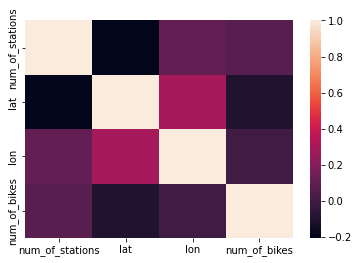

In [45]:
sns.heatmap(fsquare_bike_df.corr())